Initialize Panda and read the .csv file / database

In [3]:
import pandas as pd

bank_train = pd.read_csv('bank_marketing_train.csv')

Return the #of rows and columns as (rows, cols)

In [4]:
database = bank_train.shape
row = database[0]
col = database[1]
print ("rows : " + str(row) + 
       "\ncolumns: " + str(col))


rows : 32951
columns: 21


Create a new variable to assign every record for a unique integer

In [13]:
""" Series() and Range() method creates a string of numbers
    from 0 to the number of records
    'inex' saves as a new variable by assigning output to 'index'"""
bank_train['index'] = pd.Series(range(0, row))
print (bank_train['index'])

0            0
1            1
2            2
3            3
4            4
         ...  
32946    32946
32947    32947
32948    32948
32949    32949
32950    32950
Name: index, Length: 32951, dtype: int64


.head contains the first and last 30 records of every variable

In [6]:
RecOf30Sec = bank_train.head
print (RecOf30Sec)

<bound method NDFrame.head of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       45     services  married             basic.9y  unknown      no   no   
...    ...          ...      ...                  ...      ...     ...  ...   
32946   73      retired  married  professional.course       no     yes   no   
32947   46  blue-collar  married  professional.course       no      no   no   
32948   56      retired  married    university.degree       no     yes   no   
32949   44   technician  married  professional.course       no      no   no   
32950   74      retired  married  professional.course       no     yes   no   

         contact mont

Changing Misleading Field Values

<Axes: title={'center': 'Histogram of Days Since Previous'}, ylabel='Frequency'>

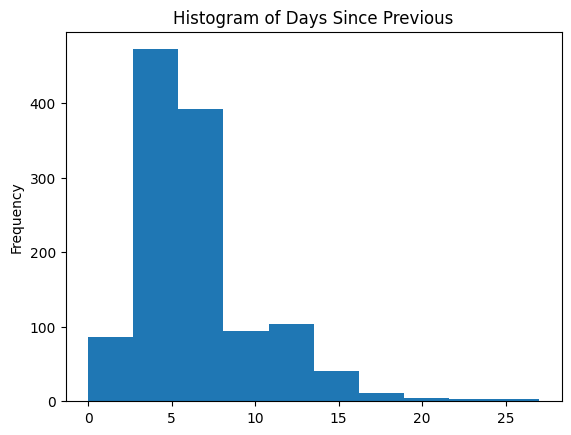

In [7]:
import numpy as np 
import matplotlib

bank_train['days_since_previous'] = bank_train['days_since_previous'].replace({999:np.NaN})

bank_train['days_since_previous'].plot(kind= 'hist', title='Histogram of Days Since Previous')

Re-Express categorical Field Values

In [8]:
bank_train['education_numeric'] = bank_train['education']
"""Education Dictionary for numeric Values"""

dict_edu = {"education_numeric": {
    "illiterate": 0,
    "basic4.y": 4,
    "basic6.y": 6,
    "basic9.y": 9,
    "high.school": 12,
    "professional.course": 12,
    "university.degree": 16,
    "unknwon": np.NaN
}}

"""Replacing the vriable's value"""
bank_train.replace(dict_edu, inplace=True)

Standardizing Numeric Fields

In [12]:
from scipy import stats

bank_train['age_z'] = stats.zscore(bank_train['age'])
print(bank_train['age_z'])

0        1.536882
1        1.632943
2       -0.288273
3       -0.000090
4        0.480214
           ...   
32946    3.169915
32947    0.576274
32948    1.536882
32949    0.384153
32950    3.265976
Name: age_z, Length: 32951, dtype: float64


Identifying Outliers:

Use z-values to identify outliers: records with extreme values
 - outlier if Z-value is greater than 3 or less than -3
 - number_of_contacts represents the number of customer contacts
 - The mean is 2.6,  with a standard deviation of 2.7:
 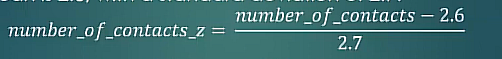
 - A customer contacted 10 times would have Z-value:
 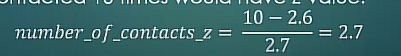
 - 10 contacts is not identified as an outlier using this method
 - should consult with client regarding what they want to do with outliers

In [11]:
bank_train_outliers = bank_train.query('age_z > 3 | age_z < -3')

print (bank_train_outliers.sort_values(['age_z'], ascending=False))

       age      job   marital          education  default housing loan  \
30769   98  retired   married           basic.4y  unknown     yes   no   
30766   98  retired   married           basic.4y  unknown     yes   no   
22291   95  retired  divorced           basic.6y       no      no   no   
31139   94  retired   married           basic.9y       no      no   no   
32361   92  retired   married            unknown       no      no  yes   
...    ...      ...       ...                ...      ...     ...  ...   
31001   72  retired  divorced           basic.6y       no     yes   no   
32167   72  retired   married           basic.4y       no     yes   no   
30089   72  retired  divorced           basic.4y       no      no   no   
30035   72  retired  divorced           basic.4y       no     yes  yes   
31819   72  retired    single  university.degree       no     yes  yes   

        contact month day_of_week  ...  previous_outcome  emp.var.rate  \
30769  cellular   oct         fri  ..

Practice Exercises


In [ ]:
#